# LTAT.02.006 Andmeteaduse meetodid
## 1. praktikum - Ülesanded

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (6, 6)

In [3]:
from numpy.random import default_rng
rng = default_rng(0)

### Ülesanne 1 - kaks täringut

Defineerime kaks täringut täringuviskena: ühe ausa ja ühe ebaausa.

In [4]:
from numpy.random import default_rng
rng = default_rng(0)

def aus_täring(visete_arv):
    return rng.integers(low=1, high=7, size=visete_arv)

def ebaaus_täring(visete_arv):
    p = [1/7, 1/7, 1/7, 1/7, 1/7, 2/7]
    return rng.choice([1,2,3,4,5,6], size=visete_arv, p=p)

Uurime, mida peab tegema selleks, et eristada ausat täringut ebaausast täringust.

1. Tehke üks vise kõigepealt ausa täringuga ja üks vise ebaausa täringuga. Kas ühe viskega saab öelda, kumb on aus ja kumb on ebaaus?

In [5]:
aus_täring(1)

array([6])

In [ ]:
ebaaus_täring(1)

array([2])

2. Genereerige nüüd seitsmeviskeline seeria ausa täringuga ja seitsmeviskeline seeria ebaausa täringuga. Kas nende visete põhjal on võimalik öelda, kumb on aus ja kumb on ebaaus?

In [ ]:
aus_täring(7)

array([4, 2, 1, 1, 1, 2, 5])

In [ ]:
ebaaus_täring(7)

array([6, 5, 6, 4, 6, 6, 1])

3. Genereerige uus seitsmeviskeline seeria mõlema täringuga ja joonistage visete tulemuste tulpdiagramm.

In [6]:
aus_seeria = aus_täring(7)
ebaaus_seeria = ebaaus_täring(7)

Kõigepealt loendame visete tulemusi käsitsi ja siis näitame kuidas seda numpy abil teha.

In [7]:
ausate_tulemuste_loendur = [0]*6
ebaausate_tulemuste_loendur = [0]*6

for i in range(7):
    aus_tulemus = aus_seeria[i]
    ausate_tulemuste_loendur[aus_tulemus-1] += 1 # -1 kuna tulemused on 1...6, indeksid aga 0...5
    ebaaus_tulemus = ebaaus_seeria[i]
    ebaausate_tulemuste_loendur[ebaaus_tulemus-1] += 1

print(ausate_tulemuste_loendur)

[3, 2, 0, 2, 0, 0]


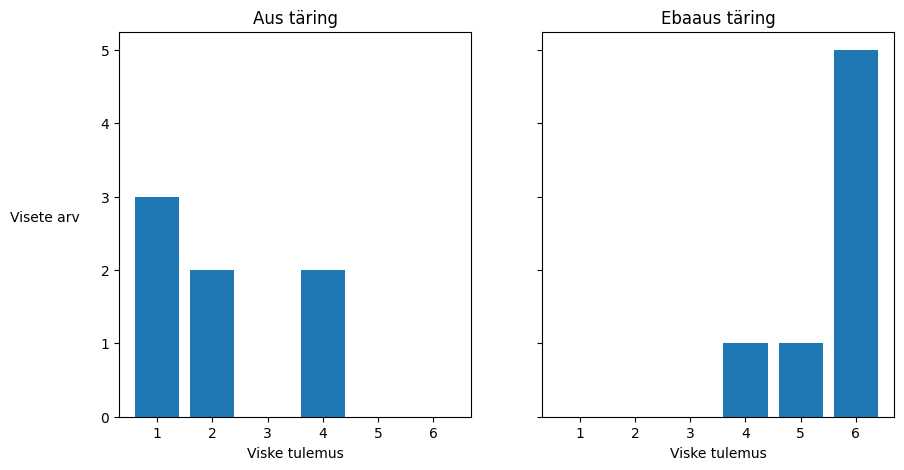

In [8]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

axs[0].bar(range(1, 7), ausate_tulemuste_loendur)
axs[0].set_title("Aus täring")
axs[0].set_ylabel("Visete arv", rotation=0, labelpad=40)
axs[0].set_xlabel("Viske tulemus")

axs[1].bar(range(1, 7), ebaausate_tulemuste_loendur)
axs[1].set_title("Ebaaus täring")
axs[1].set_xlabel("Viske tulemus")

plt.show()

Numpy võimaldab tulemusi kokku lugeda funktsiooniga `np.bincount`. See tagastab massiivi (loenduri), mille esimene element (indeksil 0) näitab, mitu viset lõppes tulemusega 0, teine element (indeksil 1) näitab mitu viset lõppes tulemusega 1 jne.

Loenduri pikkus sõltub vaikimisi sellest, milline oli andmetes kõige suurem täringuviske tulemus. Me saame funktsioonile `np.bincount` öelda, et suurim täringuviske tulemus peaks olema 6 (seda teeb `minlength=7`). Sellisel juhul on loenduri lõpus puuduvate väärtuste kohal nullid.

Kuna täringuviske tulemus ei saa olla 0, jätame loendurist esimese elemendi välja (seda teeb `[1:]`).

In [9]:
ausate_tulemuste_loendur_np = np.bincount(aus_seeria, minlength=7)[1:]
ebaausate_tulemuste_loendur_np = np.bincount(ebaaus_seeria, minlength=7)[1:]
ausate_tulemuste_loendur_np

array([3, 2, 0, 2, 0, 0])

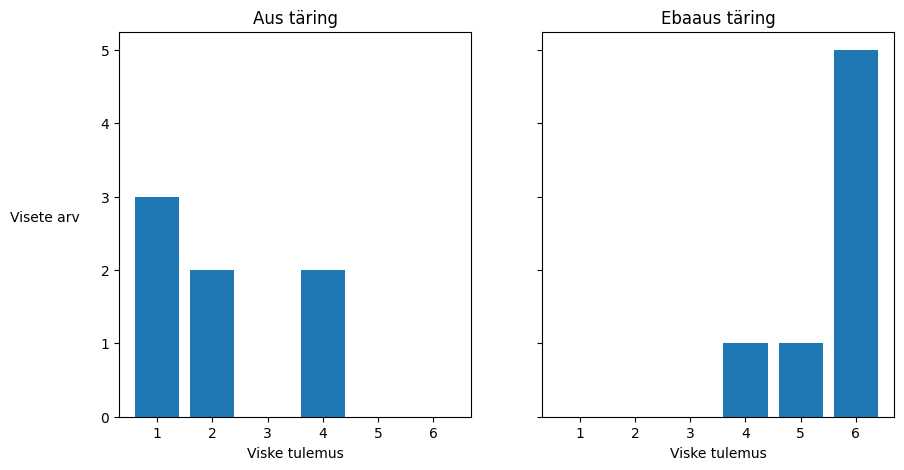

In [10]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

axs[0].bar(range(1, 7), ausate_tulemuste_loendur_np)
axs[0].set_title("Aus täring")
axs[0].set_ylabel("Visete arv", rotation=0, labelpad=40)
axs[0].set_xlabel("Viske tulemus")

axs[1].bar(range(1, 7), ebaausate_tulemuste_loendur_np)
axs[1].set_title("Ebaaus täring")
axs[1].set_xlabel("Viske tulemus")

plt.show()

4. Genereerige 9 seitsmeviskelist seeriat ausa täringuga. Tehke üks joonis, kus on 9 alamjoonist, kus iga alamjoonis kujutab ühe seeria visete tulpdiagrammi. Selleks kasutage `matplotlib` teegi alamgraafikute joonistamise võimalusi.

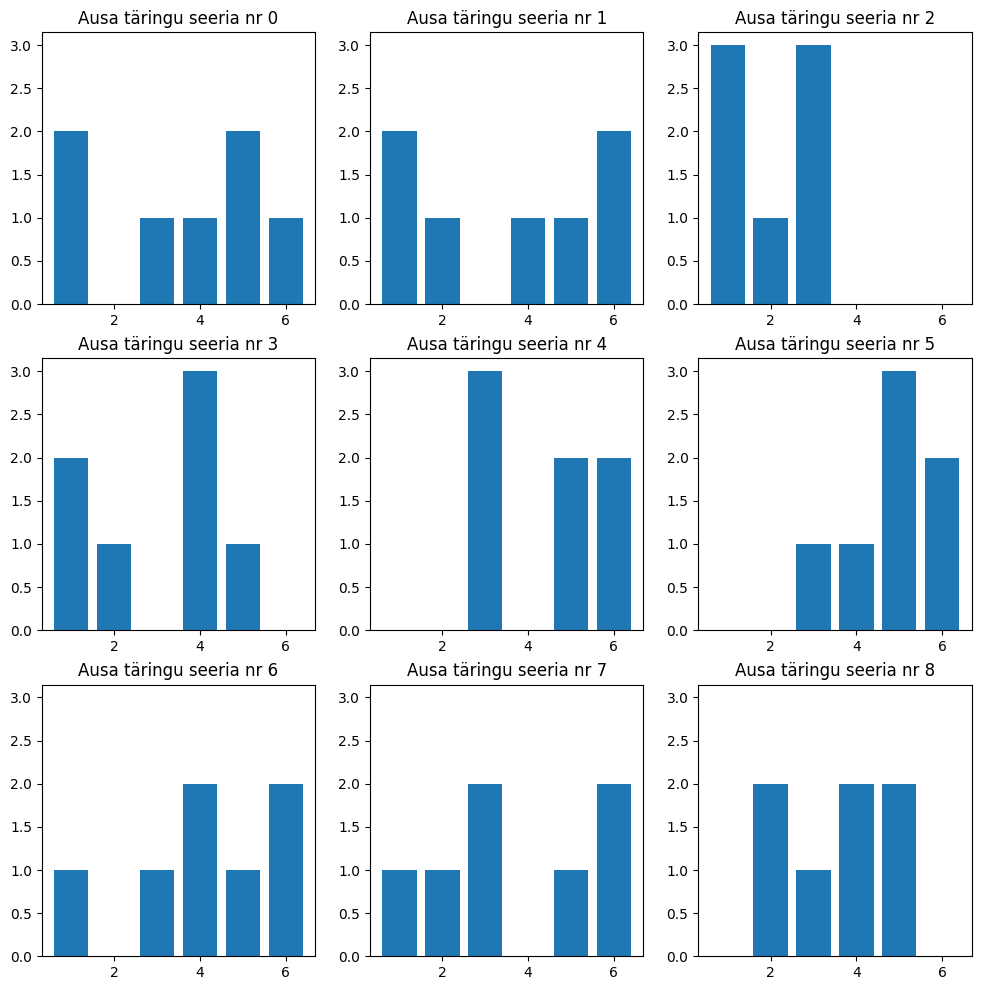

In [11]:
fig, axs = plt.subplots(3, 3,
                        sharex=True, # Kõik joonised kasutavad sama x-telje skaalat
                        sharey=True, # Kõik joonised kasutavad sama y-telje skaalat
                        figsize=(12,12))

for i in range(9):
    seeria = aus_täring(7)
    visete_loendur = np.bincount(seeria, minlength=7)[1:]

    ax = axs[i//3, i%3]
    ax.bar(range(1, 7), visete_loendur)
    ax.tick_params(labelbottom=True, # Näita x-telje numbreid igal joonisel
                   labelleft=True) # Näita y-telje numbreid igal joonisel
    ax.set_title(f"Ausa täringu seeria nr {i}")

5. Genereerige 9 seitsmeviskelist seeriat ebaausa täringuga. Tehke üks joonis, kus on 9 alamjoonist, kus iga alamjoonis kujutab ühe seeria visete tulpdiagrammi.

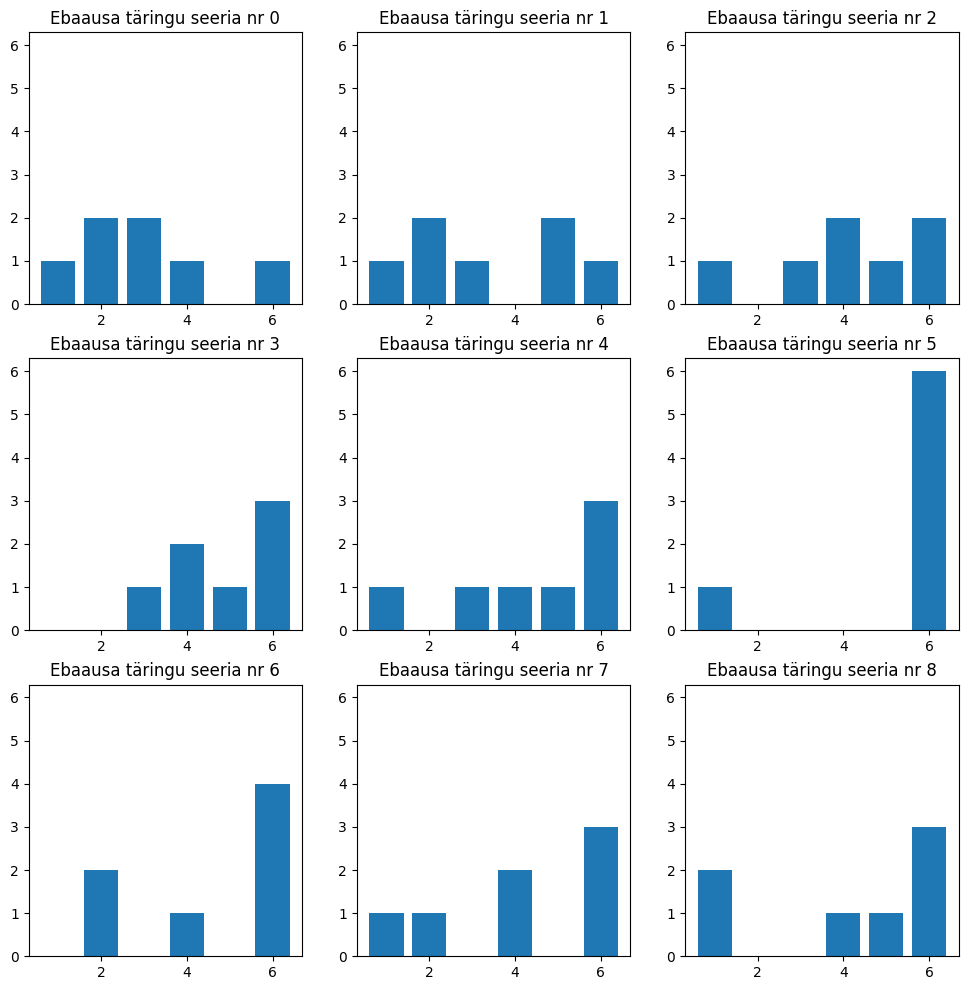

In [ ]:
fig, axs = plt.subplots(3, 3,
                        sharex=True, # Kõik joonised kasutavad sama x-telje skaalat
                        sharey=True, # Kõik joonised kasutavad sama y-telje skaalat
                        figsize=(12,12))

for i in range(9):
    seeria = ebaaus_täring(7)
    visete_loendur = np.bincount(seeria, minlength=7)[1:]

    ax = axs[i//3, i%3]
    ax.bar(range(1, 7), visete_loendur)
    ax.tick_params(labelbottom=True, # Näita x-telje numbreid igal joonisel
                   labelleft=True) # Näita y-telje numbreid igal joonisel
    ax.set_title(f"Ebaausa täringu seeria nr {i}")

6. Vaadake eelmisi tulpdiagramme. Kas nende jooniste põhjal oleks võimalik öelda, milline on aus ja milline ebaaus täring?

7. Katsetage eri pikkusega seeriaid. Millise seeria pikkuse juures tundub juba võimalik öelda, kas tegu on ausa või ebaausa täringuga?

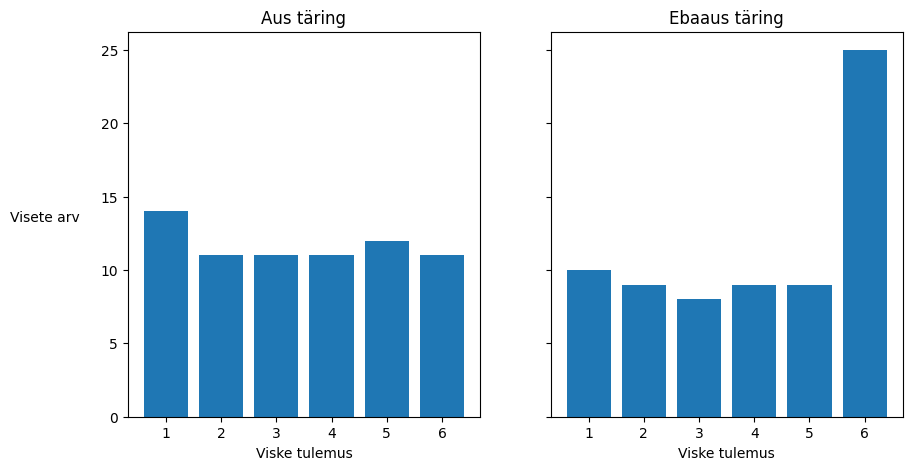

In [ ]:
n = 70
aus_seeria = aus_täring(n)
aus_loendur = np.bincount(aus_seeria, minlength=7)

ebaaus_seeria = ebaaus_täring(n)
ebaaus_loendur = np.bincount(ebaaus_seeria, minlength=7)

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

axs[0].bar(range(1, 7), aus_loendur[1:])
axs[0].set_title("Aus täring")
axs[0].set_ylabel("Visete arv", rotation=0, labelpad=40)
axs[0].set_xlabel("Viske tulemus")

axs[1].bar(range(1, 7), ebaaus_loendur[1:])
axs[1].set_title("Ebaaus täring")
axs[1].set_xlabel("Viske tulemus")

plt.show()

Visatud kuute arv järgib binoomjaotust. Uurime nüüd lähemalt, mis see tähendab.

8. Visake ausat täringut 10 korda ja lugege kokku, mitu kuut tuli.

In [ ]:
seeria = aus_täring(10)

In [ ]:
# tavaline for loop
kuute_arv = 0
for vise in seeria:
    if vise == 6:
        kuute_arv += 1
seeria, kuute_arv

(array([4, 1, 1, 1, 2, 6, 5, 4, 6, 3]), 2)

In [ ]:
# numpy-likult
kuute_arv_np = (seeria == 6).sum()
seeria, kuute_arv_np

(array([4, 1, 1, 1, 2, 6, 5, 4, 6, 3]), np.int64(2))

9. Analoogselt eelmisele punktile, visake ausa täringuga 10-viskeline seeria ja lugege kokku, mitu kuut tuli. Seekord aga korrake seda protsessi 1000 korda, ja salvestage iga kord saadud kuute arv. Genereerige tulpdiagramm, kus on joonistatud saadud kuute arvu sagedused 1000 seeria korral.

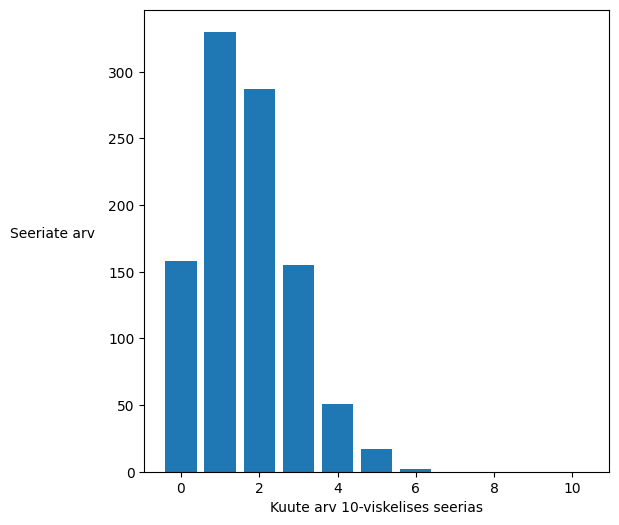

In [ ]:
kuute_arvu_list = []
for i in range(1000):
    seeria = aus_täring(10)
    kuute_arv = (seeria == 6).sum()
    kuute_arvu_list.append(kuute_arv)

kuute_arvu_sagedused = np.bincount(kuute_arvu_list, minlength=11) #0 ... 10 on võimalikud
plt.bar(range(11), kuute_arvu_sagedused)
plt.xlabel("Kuute arv 10-viskelises seerias")
plt.ylabel("Seeriate arv", rotation = 0, labelpad = 40)
plt.show()

10. Visake nüüd ebaausa täringuga 10-viskeline seeria ja lugege kokku, mitu kuut tuli ning korrake seda protsessi 1000 korda. Iga kord salvestage taaskord saadud kuute arv. Genereerige tulpdiagramm, kus on joonistatud saadud kuute arvu sagedused 1000 seeria korral.

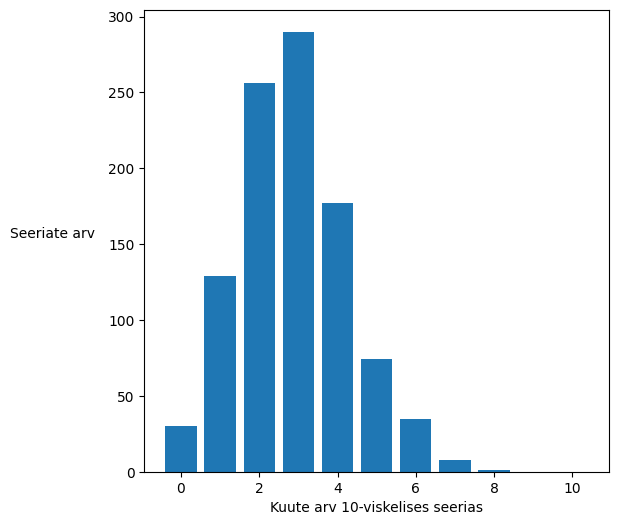

In [ ]:
kuute_arvu_list = []
for i in range(1000):
    seeria = ebaaus_täring(10)
    kuute_arv = (seeria == 6).sum()
    kuute_arvu_list.append(kuute_arv)

kuute_arvu_sagedused = np.bincount(kuute_arvu_list, minlength=11) #0 ... 10 on võimalikud
plt.bar(range(11), kuute_arvu_sagedused)
plt.xlabel("Kuute arv 10-viskelises seerias")
plt.ylabel("Seeriate arv", rotation = 0, labelpad = 40)
plt.show()

11. Selgitage, kuidas on võimalik ainult visatud kuute arvu jälgides tuvastada, kas täring on aus või ebaaus.

**Vastus:** kõige sagedasem kuute arv seerias on ausal täringul 1, kuid ebaausal täringul 3.

### Ülesanne 2 - õpilaste hinded

Teeme läbi loengus näidatud õpilaste hinnete analüüsi. Õpilaste punktisummad on täisarvud vahemikus 0 kuni 50, puinktisummade keskmine on umbes 31 ja standardhälve 13. Õpilasi oli valimis 1365.

In [ ]:
from scipy.stats import norm

Esmane pakkumine võiks olla, et õpilaste punktisummad järgivad normaaljaotust, mille keskmine on 31 punkti ja standardhälve 13.

Esimene probleem on aga selles, et punktisummad on täisarvulised, normaaljaotus on aga pidev jaotus. Lihtsaim võimalus on eeldada, et nö 'tegelikud punktisummad' on reaalarvulised, aga ümardatakse lähima täisarvuni. Sellisel juhul näiteks kõik punktid vahemikus 0.5...1.5 annaksid punktisummaks 1.

Teine probleem on, et normaaljaotus ei ole piiratud vahemikuga 0...50. Selle probleemi saab lahendada, kui lihtsalt ignoreerida punktisummasid, mis justkui oleksid sellest vahemikust väljas. Sellisel juhul saab leida normaaljaotusest iga punkti jaoks leitud tõenäosused ja skaleerida nii, et kõikide punktide tõenäosuste summa oleks 1.

1. Uurige `scipy` teegi normaaljaotuse [dokumentatsiooni](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html). Kuidas saaks leida tõenäosuse, et punktisumma on 1 (esialgu eeldame, et punktisummad võivad minna mõlemale poole lõpmatusse, st ignoreerime skaleerimist).

In [ ]:
norm.cdf(1.5, loc=31, scale=13) - norm.cdf(0.5, loc=31, scale=13)

np.float64(0.0021430099225247384)

2. Leidke nüüd kõikide võimalike punktisummade jaoks (0...50) vastava punktisumma saamise tõenäosus. Kuidas käsitleda vahemiku otspunkte 0 ja 50?

In [ ]:
tõenäosused = []
for i in range(0, 51):
    if i == 0:
        tõenäosus = norm.cdf(0.5, loc=31, scale=13) - norm.cdf(0, loc=31, scale=13)
    elif i == 50:
        tõenäosus = norm.cdf(50, loc=31, scale=13) - norm.cdf(49.5, loc=31, scale=13)
    else:
        tõenäosus = norm.cdf(i+0.5, loc=31, scale=13) - norm.cdf(i-0.5, loc=31, scale=13)
    tõenäosused.append(tõenäosus)

In [ ]:
sum(tõenäosused)

np.float64(0.9195176429830876)

3. Skaleeriga saadud tõenäosused nii, et nende summa oleks 1

In [ ]:
skaleeritud_tõenäosused = []
for skaleerimata_tõenäosus in tõenäosused:
    skaleeritud_tõenäosus = skaleerimata_tõenäosus / sum(tõenäosused)
    skaleeritud_tõenäosused.append(skaleeritud_tõenäosus)
skaleeritud_tõenäosused = np.array(skaleeritud_tõenäosused)

In [ ]:
#alternatiiv
skaleeritud_tõenäosused = tõenäosused / sum(tõenäosused)

In [ ]:
sum(skaleeritud_tõenäosused)

np.float64(1.0)

4. Õpilasi oli kokku 1365. Joonistage eelkirjeldatud eeldustel punktisummade jaotus.

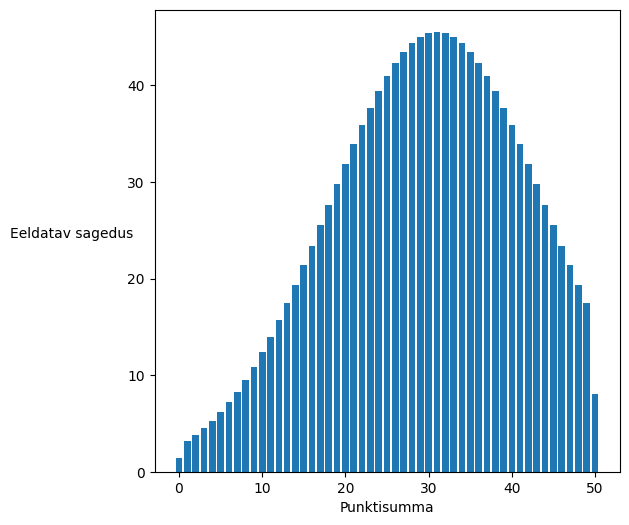

In [ ]:
plt.bar(range(0, 51), skaleeritud_tõenäosused * 1365)
plt.xlabel("Punktisumma")
plt.ylabel("Eeldatav sagedus", rotation = 0, labelpad = 40)
plt.show()

5. Realistlikult aga ei järgi tegelik jaotus nii ilusti teoreetilist jaotust. Tegelik jaotus on mingi juhuslik  valim leitud jaotusest. Võtke 1365 juhuslikku punkti antud jaotusest ja joonistage tulpdiagramm tegelike tulemuste jaotuse kohta.

In [ ]:
rng = default_rng(0)

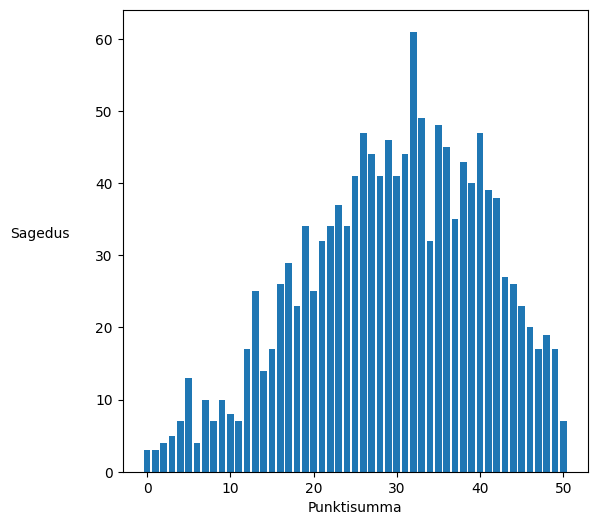

In [ ]:
punktid = rng.choice(range(0, 51), size=1365, p=skaleeritud_tõenäosused)
punktide_arv = np.bincount(punktid)
plt.bar(range(0, 51), punktide_arv)
plt.xlabel("Punktisumma")
plt.ylabel("Sagedus", rotation = 0, labelpad = 40)
plt.show()

6. Lugege sisse andmefail 'praktikum_1_yl_2.csv', kus on igas veerus toodud üks tegelik õpilase poolt saadud punktisumma

In [ ]:
data = pd.read_csv("praktikum_1_yl_2.csv")
data

,punktisummad
0,42
1,23
2,3
3,45
4,30
...,...
1360,2
1361,35
1362,39
1363,29


7. Joonistage tegeliku punktisummade jaotus antud faili põhjal.

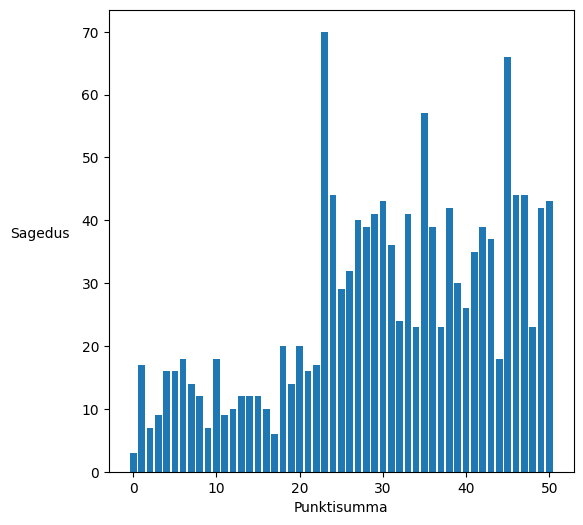

In [ ]:
tegelikud_sagedused = np.bincount(data["punktisummad"])
plt.bar(range(51), tegelikud_sagedused)
plt.xlabel("Punktisumma")
plt.ylabel("Sagedus", rotation = 0, labelpad = 30)
plt.show()

8. Kas tegeliku jaotuse põhjal tundub eeldus normaaljaotuse põhjal realistlik?

9. Joonistage viie vahemikuga histogramm tegelikust punktisummade jaotusest. Uurige, mis on `plt.hist` väljundiks.

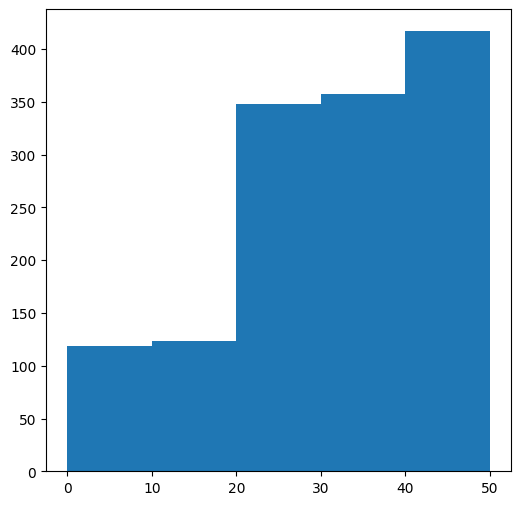

In [ ]:
andmed_5_vahemikus = plt.hist(data["punktisummad"], bins=5)

9. Viimases vahemikus on 11 võimalikku väärtust, samas kui teistes on 10. Seepärast tuleb tõenäosusjaotuse tekitamiseks viimane ümber skaleerida.

In [ ]:
andmed_5_vahemikus[0][4] *= 10./11
andmed_5_vahemikus

(array([119.        , 123.        , 348.        , 358.        ,
        379.09090909]),
 array([ 0., 10., 20., 30., 40., 50.]),
 <BarContainer object of 5 artists>)

10. Genereerige nüüd tükiti ühtlane tõenäosusjaotus, kus iga vahemiku osakaal on vastava vahemiku histogrammi kõrgusega vastavuses. Joonistage selle jaotuse tulpdiagramm.

Oodatav tulemus:

![](oodatav_tulemus.png)

In [ ]:
jaotus_5v_jargi = np.repeat(andmed_5_vahemikus[0], [10,10,10,10,11])
jaotus_5v_jargi = jaotus_5v_jargi / sum(jaotus_5v_jargi)
jaotus_5v_jargi

array([0.00871795, 0.00871795, 0.00871795, 0.00871795, 0.00871795,
       0.00871795, 0.00871795, 0.00871795, 0.00871795, 0.00871795,
       0.00901099, 0.00901099, 0.00901099, 0.00901099, 0.00901099,
       0.00901099, 0.00901099, 0.00901099, 0.00901099, 0.00901099,
       0.02549451, 0.02549451, 0.02549451, 0.02549451, 0.02549451,
       0.02549451, 0.02549451, 0.02549451, 0.02549451, 0.02549451,
       0.02622711, 0.02622711, 0.02622711, 0.02622711, 0.02622711,
       0.02622711, 0.02622711, 0.02622711, 0.02622711, 0.02622711,
       0.02777223, 0.02777223, 0.02777223, 0.02777223, 0.02777223,
       0.02777223, 0.02777223, 0.02777223, 0.02777223, 0.02777223,
       0.02777223])

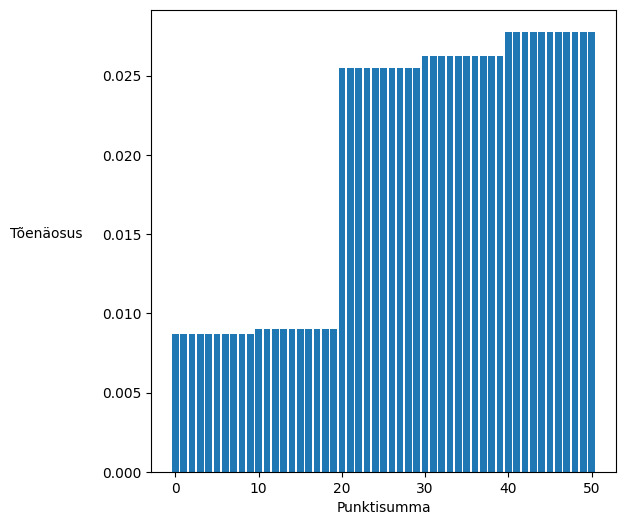

In [ ]:
plt.bar(range(51),jaotus_5v_jargi)
plt.xlabel("Punktisumma")
plt.ylabel("Tõenäosus", rotation = 0, labelpad = 40)
plt.show()

11. Genereerige juhuslikult 1365 äsjagenereeritud jaotusest. Kas näeb sarnane välja tegeliku jaotusega?

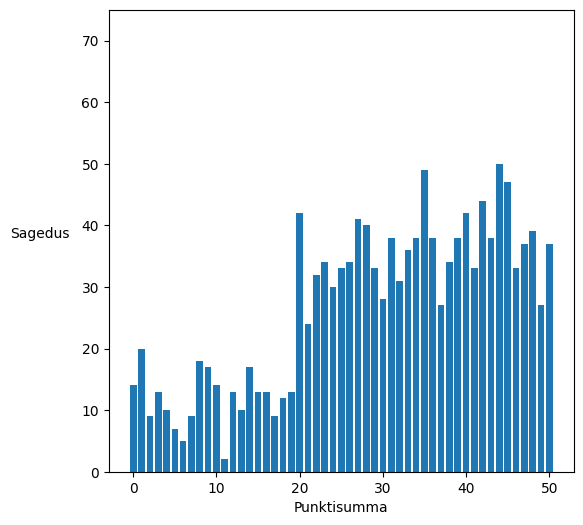

In [ ]:
rng = default_rng(0)
gen_5v_jargi = rng.choice(range(51), 1365, p = jaotus_5v_jargi)
plt.ylim((0,75))
plt.bar(range(51), np.bincount(gen_5v_jargi))
plt.xlabel("Punktisumma")
plt.ylabel("Sagedus", rotation = 0, labelpad = 30)
plt.show()

12. Genereerige 100 andmestikku, leidke iga punktisumma kohta suurim ja vähim sagedus. Millised andmed on tegelikust erinevad?

In [ ]:
rng = default_rng(0)
min_sagedused = 51*[2000]
max_sagedused = 51*[0]
for i in range(100):
    gen_5v_jargi = rng.choice(range(51),size=1365,p=jaotus_5v_jargi)
    gen_5v_sagedused = np.bincount(gen_5v_jargi)
    min_sagedused = np.minimum(min_sagedused, gen_5v_sagedused)
    max_sagedused = np.maximum(max_sagedused, gen_5v_sagedused)

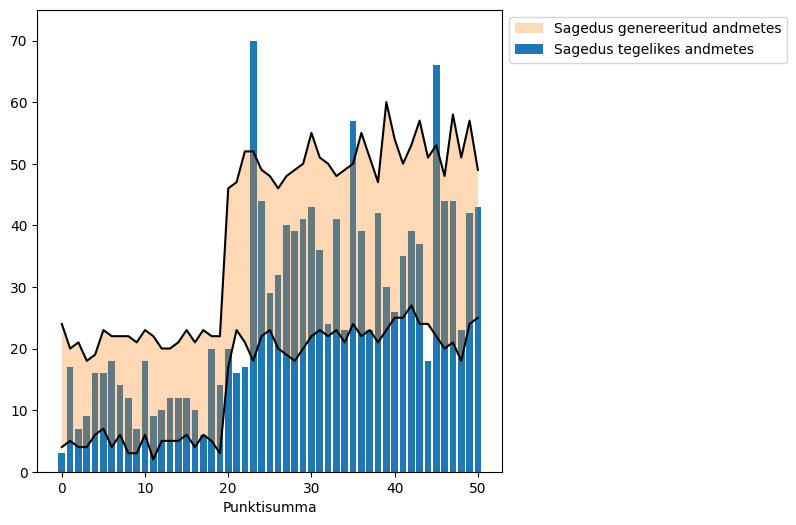

In [ ]:
plt.xticks(range(0,51,10))
plt.yticks(range(0,71,10))
plt.ylim((0,75))

tegelikud_sagedused = np.bincount(data["punktisummad"])
plt.bar(x = range(51),
        height = tegelikud_sagedused,
        label = "Sagedus tegelikes andmetes")

plt.fill_between(x = range(51),
                 y1 = min_sagedused,
                 y2 = max_sagedused,
                 alpha = 0.3,
                 label = "Sagedus genereeritud andmetes")

plt.plot(range(51), min_sagedused, color='black')
plt.plot(range(51), max_sagedused, color='black')
# Paigutame joonisele legendi. Legendi ülemine vasak nurk ('upper left') asub joonise ülemises paremas nurgas (1, 1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Punktisumma")
plt.show()

13. Sobita andmetele täpsema kujuga jaotus kasutades meetodit KDE (kernel density estimation, vaata alltoodud vihjet). Kuva saadud jaotuse tihedusfunktsioon tegelike andmete suhteliste sageduste taustal.
    
VIHJE: Kasuta käsku `kde = stats.gaussian_kde(data.punktisummad)`, mis sisuliselt paneb iga andmepunkti ümber kitsa normaaljaotuse ning siis teeb kõigist nendest normaaljaotustest suure segu. Seejuures on selle käsu sees kasutusel kavalad meetodid, et nende kitsaste normaaljaotuste 'laius' parajalt valida. Jaotusel `kde` on defineeritud tihedusfunktsioon, mida saab rakendada sarnaselt nagu `scipy.stats.norm.pdf`, ehk siis `kde.pdf([10, 20])` ütleb tõenäosuse tiheduse väärtustel 10 ja 20 punkti. Jaotusfunktsiooni (cdf) otseselt ei ole, aga selle eest saab küsida näiteks 30.5 ja 31.5 vahele langemise tõenäosust: `kde.integrate_box([30.5],[31.5])`.

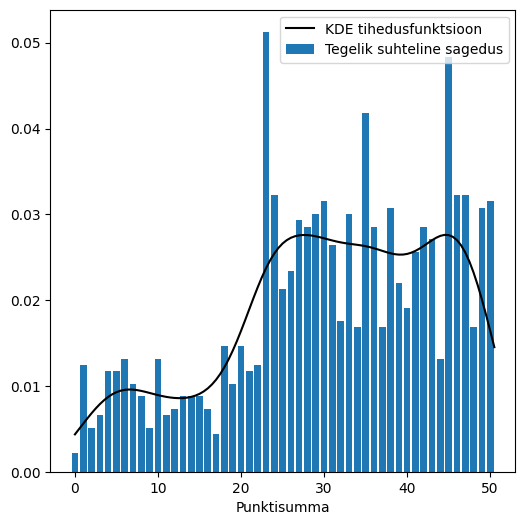

In [ ]:
from scipy import stats
kde = stats.gaussian_kde(data.punktisummad)

tegelikud_sagedused = np.bincount(data["punktisummad"])
plt.bar(x = range(51),
        height = tegelikud_sagedused / np.sum(tegelikud_sagedused),
        label = "Tegelik suhteline sagedus")

plt.plot(np.arange(0,51,0.5), kde.pdf(np.arange(0,51,0.5)),
         c = "black", label = "KDE tihedusfunktsioon")

plt.legend()
plt.xlabel("Punktisumma")
plt.show()

14. Arvuta kõigi võimalike täisarvuliste punktide 0 kuni 50 saamise tõenäosused kui punktid võtta KDE jaotusest ja seejärel ümardada. Visualiseeri leitud oodatavad suhtelised sagedused nüüd tulpdiagrammina.

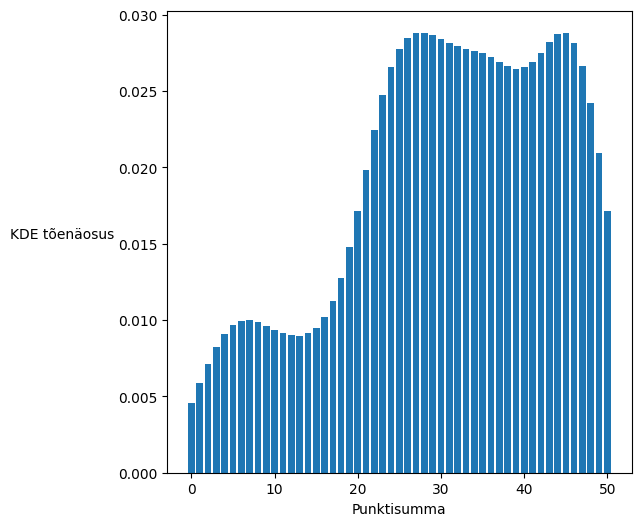

In [ ]:
t_kde = [kde.integrate_box(i-0.5, i+0.5) for i in range(51)]
t_kde = np.array(t_kde) / sum(t_kde)
plt.bar(range(51), t_kde)
plt.xlabel("Punktisumma")
plt.ylabel("KDE tõenäosus", rotation = 0, labelpad = 40)
plt.show()

15. Genereerige juhuslikult 1365 äsjagenereeritud jaotusest. Kas näeb sarnane välja tegeliku jaotusega?

In [ ]:
rng = default_rng(0)
jaotus_kde = rng.choice(np.arange(51), 1365, p = t_kde )

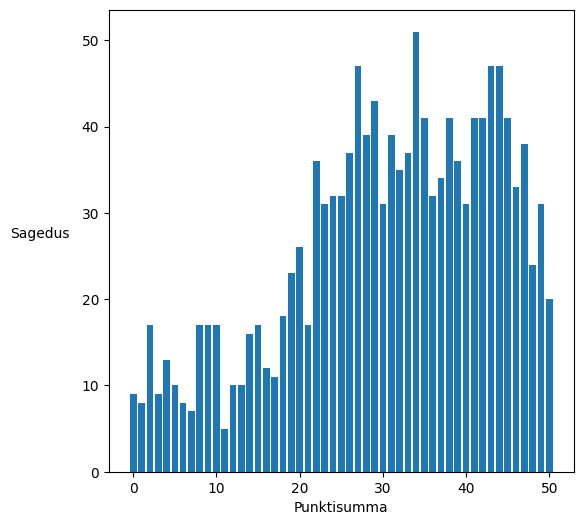

In [ ]:
plt.bar(np.arange(51), np.bincount(jaotus_kde))
plt.xlabel("Punktisumma")
plt.ylabel("Sagedus", rotation = 0, labelpad = 30)
plt.show()

16. Genereerige nüüd taas 100 andmestikku, leidke iga punktisumma kohta suurim ja vähim sagedus. Millised andmed on tegelikust erinevad?

In [ ]:
rng = default_rng(0)
min_sagedused_kde = 51*[2000]
max_sagedused_kde = 51*[0]
for i in range(100):
    kde_jargi = rng.choice(range(51), size=1365, p=t_kde)
    kde_sagedused = np.bincount(kde_jargi)
    min_sagedused_kde = np.minimum(min_sagedused_kde, kde_sagedused)
    max_sagedused_kde = np.maximum(max_sagedused_kde, kde_sagedused)

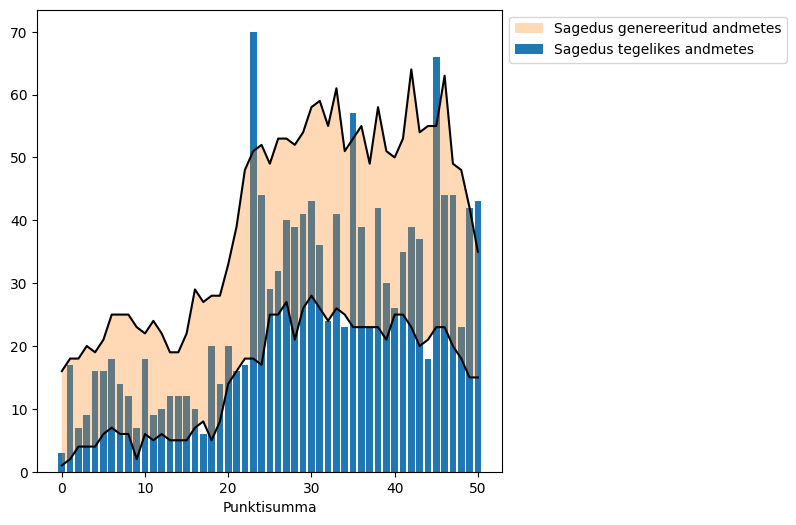

In [ ]:
plt.xticks(range(0,51,10))
plt.yticks(range(0,71,10))
plt.bar(x = range(51),
        height = np.bincount(data.punktisummad),
        label = "Sagedus tegelikes andmetes")

plt.fill_between(x = range(51),
                 y1 = min_sagedused_kde,
                 y2 = max_sagedused_kde,
                 alpha = 0.3,
                 label = "Sagedus genereeritud andmetes")

plt.plot(range(51), min_sagedused_kde, color='black')
plt.plot(range(51), max_sagedused_kde, color='black')
# Paigutame joonisele legendi. Legendi ülemine vasak nurk ('upper left') asub joonise ülemises paremas nurgas (1, 1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Punktisumma")
plt.show()